In [90]:
import pandas as pd
import datetime
import seaborn as sns

In [91]:
# 데이터 임포트
transaction_df = pd.read_parquet('D:/kkbox-churn-prediction-challenge/data/sample/sample_ratio_0.107/sample_transactions.parquet/sample_transactions (ratio=0.107).parquet')

In [92]:
# 날짜 형식으로 변경

transaction_df['membership_expire_date'] = pd.to_datetime(transaction_df['membership_expire_date'])
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

In [93]:
# 아이디와 거래일의 중복값 중 첫번째 & 구독 취소 유저가 아닌 경우를 제거
transaction_filter1 = (~((transaction_df.duplicated(['msno_num', 'transaction_date'], keep='first')) & (transaction_df['is_cancel'] == 0)))

# 위에서 필터링되지 않은 같은 구독 취소 거래가 중복된 값 제거
cols = list(transaction_df.columns)[1:9]
cols.remove('membership_expire_date')
transaction_filter2 = (~((transaction_df.duplicated(cols, keep='first')) & (transaction_df['is_cancel'] == 1)))

# 멤버쉽 만료일 > 거래일 인 경우만 남김
transaction_filter3 = (transaction_df['transaction_date'] < transaction_df['membership_expire_date'])

# kkbox 출시일인 2005년부터 시작하여 최대 구독 기간인 1년 + 30일(공짜로 줌) 이후까지
min_timestamp = pd.Timestamp(datetime.date(2005,1,1))
max_timestamp = pd.Timestamp(datetime.date(2018,4,30))

# 만료일이 서비스 시작일인 2005년부터 구독권의 최장기간인 1년 + 30일 이하(2018.4.31 이하)인 경우만 남김
transaction_filter4 = ((transaction_df['membership_expire_date'] >= min_timestamp) & (transaction_df['membership_expire_date'] <= max_timestamp))

In [94]:
# 필터 적용
transaction_filtered = transaction_df[transaction_filter1&transaction_filter2&transaction_filter3&transaction_filter4]

In [103]:
len(transaction_filtered)/len(transaction_df)

0.9708788170261641

In [95]:
transaction_filtered[transaction_filtered.duplicated(keep=False)]

,msno_num,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel


In [96]:
# id와 거래내역으로 보았을 때, 같은 달에 구독을 취소한 경우만 남은 것을 확인
transaction_filtered[transaction_filtered.duplicated(['msno_num', 'transaction_date'],keep=False)].head(60)

,msno_num,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
554,56584,41,30,129,129,1,2015-04-07,2016-06-04,0
562,56584,41,30,149,149,1,2015-04-07,2016-05-05,1
1298,169320,36,30,180,180,1,2016-05-27,2016-06-26,0
1302,169320,40,30,149,149,1,2016-05-27,2016-06-26,1
2639,381957,40,0,0,149,1,2015-05-08,2015-07-05,0
2640,381957,40,0,0,149,1,2015-05-08,2015-06-04,1
2679,394205,41,30,99,99,1,2015-12-13,2017-02-16,0
2695,394205,41,30,149,149,1,2015-12-13,2017-01-16,1
3096,459657,41,30,99,99,1,2015-11-11,2015-12-11,0
3102,459657,41,30,129,129,1,2015-11-11,2015-11-12,1


<AxesSubplot: >

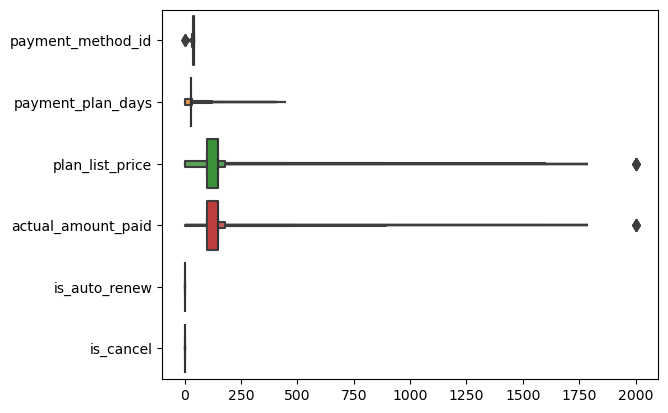

In [97]:
cols = transaction_filtered.columns[1:9]
sns.boxenplot(data=transaction_filtered[cols], orient='h')

In [98]:
transaction_filtered[transaction_filtered['plan_list_price'] > 500]['plan_list_price'].unique()

array([1788,  894, 1599,  536,  799, 1200,  600,  699,  930,  596, 1299,
       1000, 1399, 1150, 2000])

In [99]:
transaction_filtered[transaction_filtered['plan_list_price'] > 1000]

,msno_num,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
23,4353,32,410,1788,1788,0,2016-01-14,2017-02-27,0
181,15870,22,410,1788,1788,0,2016-01-18,2017-03-06,0
182,15870,22,410,1788,1788,0,2017-03-07,2018-04-24,0
595,62034,32,410,1788,1788,0,2015-12-25,2017-02-15,0
596,62034,32,410,1788,1788,0,2017-02-09,2018-04-04,0
...,...,...,...,...,...,...,...,...,...
1688940,6316892,22,410,1788,1788,0,2015-06-28,2016-08-21,0
1689502,6481501,38,410,1788,1788,0,2016-02-07,2017-03-23,0
1691603,7084963,32,410,1788,1788,0,2016-02-10,2017-03-29,0
1691877,7175882,32,410,1788,1788,0,2015-04-18,2016-06-01,0


In [100]:
transaction_filtered[transaction_filtered['plan_list_price'] > 1788]

,msno_num,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
579279,551281,28,400,2000,2000,0,2016-01-03,2017-02-09,0
889614,6635617,28,400,2000,2000,0,2016-01-27,2017-03-05,0
943269,7047747,28,400,2000,2000,0,2016-01-27,2017-03-02,0
990152,6345186,28,400,2000,2000,0,2015-12-27,2017-02-02,0
1247892,48550,28,400,2000,2000,0,2015-10-05,2016-11-08,0
1343685,6452922,28,400,2000,2000,0,2015-11-22,2016-12-26,0
